<a href="https://colab.research.google.com/github/liannie707/Unit2_Python/blob/main/Unit_3_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SET UP**

In [ ]:
# ENVIRONMENT SET UP
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import pylab 
%matplotlib inline

# DATA COLLECTION 
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

# DATA WRANGLING 
df.drop('fips', inplace=True, axis=1)
df.query("date >= '2020-01-01' & date < '2021-01-01' ", inplace=True)
df.sort_values(by='date')

### **DATA WRANGLING & EDA**




(10000.0, 50000.0)

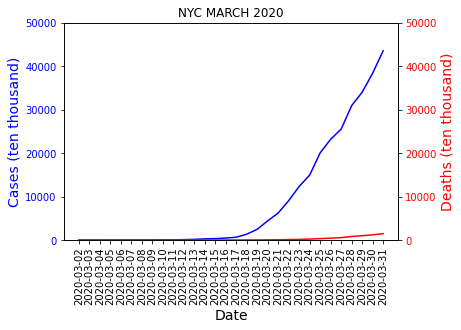

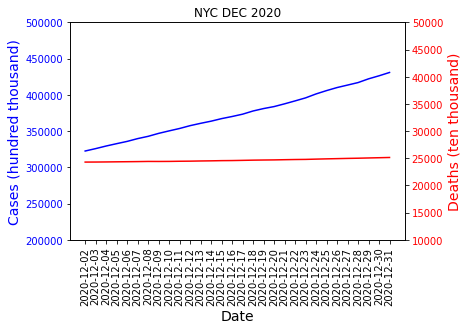

In [97]:
# LINE GRAPH COMPARING CASES TO DEATHS FOR NYC COUNTY 

# IN MARCH 2020
state = df["state"] == 'New York'
county_NYC = df["county"] == 'New York City'
date_mar_2020 = (df['date'] > '2020-03-01') & (df['date'] < '2020-04-01')
nyc_march = df[state & county_NYC & date_mar_2020]
nyc_march

fig, ax = plot.subplots()
ax.plot('date', 'cases', data=nyc_march, color='blue')
ax.set_title('NYC MARCH 2020')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cases (ten thousand)", color="blue",fontsize=14)
ax.tick_params(axis='y', labelcolor='blue')
ax.set_ylim([0,50000])

plot.xticks(rotation='vertical')

ax2=ax.twinx()
ax2.plot('date', 'deaths', data=nyc_march, color="red")
ax2.set_ylabel("Deaths (ten thousand)", color="red", fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0,50000])



# IN DEC 2020
state = df["state"] == 'New York'
county_NYC = df["county"] == 'New York City'
date_dec_2020 = (df['date'] > '2020-12-01') & (df['date'] <= '2020-12-31')
nyc_dec = df[state & county_NYC & date_dec_2020]
nyc_dec

fig, ax = plot.subplots()
ax.plot('date', 'cases', data=nyc_dec, color='blue')
ax.set_title('NYC DEC 2020')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cases (hundred thousand)", color="blue",fontsize=14)
ax.tick_params(axis='y', labelcolor='blue')
ax.set_ylim([200000,500000])

plot.xticks(rotation='vertical')

ax2=ax.twinx()
ax2.plot('date', 'deaths', data=nyc_dec, color="red")
ax2.set_ylabel("Deaths (ten thousand)", color="red", fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([10000,50000])

**Using a line graph can be misleading in this case because of the different axis values between Cases and Deaths. However, from the graphs, we can see that in March, the number of cases sky rocketed while the total number of deaths did not increase exponentially. In the second graph, we can see that the total number of cases increased 10 times than it was in March. In March, cases were below 50,000 but in DEC, cases were over 300,000. The total number of deaths also spiked up from less than 5,000 deaths in March to over 25,000 in DEC.**

---



In [141]:
# SEARCHING WHICH STATE-COUNTY HAD THE MOST CASES IN 2020

df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df.query("date >= '2020-01-01' & date < '2021-01-01' ", inplace=True)
df.groupby(["state", "county"])["cases"].max().sort_values(ascending=False)

state           county       
California      Los Angeles      770915
New York        New York City    430863
Illinois        Cook             393652
Arizona         Maricopa         322449
Florida         Miami-Dade       298872
                                  ...  
Montana         Unknown               0
New York        Unknown               0
South Carolina  Unknown               0
Texas           Unknown               0
Kansas          Unknown               0
Name: cases, Length: 3273, dtype: int64

Text(0, 0.5, 'count (hundred thousand)')

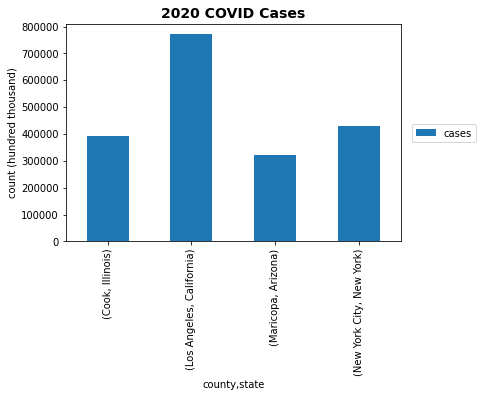

In [134]:
# BAR PLOT COMPARING THE TOP 4 STATE-COUNTY WITH THE MOST COVID CASES IN 2020

df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df.drop('fips', inplace=True, axis=1)
df.query("date >= '2020-01-01' & date < '2021-01-01' ", inplace=True)
df.query("state == 'New York' | state == 'California' | state == 'Illinois'| state == 'Arizona'", inplace=True)
df.query("county == 'Los Angeles' | county == 'New York City' | county == 'Cook'| county == 'Maricopa'", inplace=True)

df.groupby(['county', 'state'])['cases'].max().plot(kind='bar', legend=True)
plot.title('2020 COVID Cases', weight='bold', size=14)
plot.legend(bbox_to_anchor=(1,0.5), loc="center", fontsize=10, bbox_transform=plot.gcf().transFigure)
pylab.ylabel('count (hundred thousand)')

**After searching up which state and county had the most cases by the end of 2020, I was able to plot the top four state-county with a bar plot as shown above. This bar plot gives a better visual of how wide of a difference there is between the four states in terms of COVID cases. California, LA has a significantly larger number of COVID cases than the other states, and I was surprised to see NYC' number of cases were around the same amount as the other two states. I also didn't expect to see Illinois and Arizona to make it to the top four since I personally haven't really heard much about those states having a high number of cases on the news.**



In [142]:
# SEARCHING WHICH STATE-COUNTY HAD THE MOST DEATHS IN 2020

df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df.query("date >= '2020-01-01' & date < '2021-01-01' ", inplace=True)
df.groupby(["state", "county"])["deaths"].max().sort_values(ascending=False)

state        county       
New York     New York City    25144.0
California   Los Angeles      10345.0
Illinois     Cook              8285.0
Arizona      Maricopa          5125.0
Florida      Miami-Dade        4188.0
                               ...   
Puerto Rico  Vega Baja            NaN
             Vieques              NaN
             Villalba             NaN
             Yabucoa              NaN
             Yauco                NaN
Name: deaths, Length: 3273, dtype: float64

Text(0, 0.5, 'count (ten thousand)')

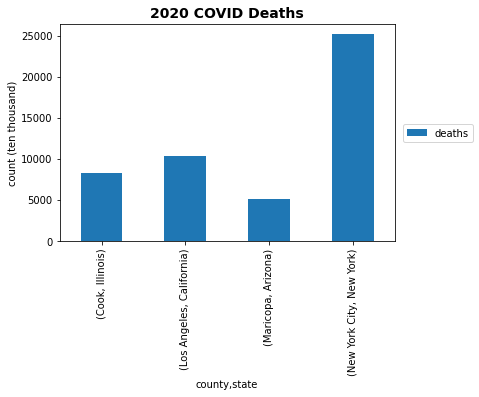

In [146]:
# BAR PLOT COMPARING THE TOP 4 STATE-COUNTY WITH THE MOST COVID DEATHS IN 2020

df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df.drop('fips', inplace=True, axis=1)
df.query("date >= '2020-01-01' & date < '2021-01-01' ", inplace=True)
df.query("state == 'New York' | state == 'California' | state == 'Illinois'| state == 'Arizona'", inplace=True)
df.query("county == 'Los Angeles' | county == 'New York City' | county == 'Cook'| county == 'Maricopa'", inplace=True)

df.groupby(['county', 'state'])['deaths'].max().plot(kind='bar', legend=True)
plot.title('2020 COVID Deaths', weight='bold', size=14)
plot.legend(bbox_to_anchor=(1,0.5), loc="center", fontsize=10, bbox_transform=plot.gcf().transFigure)
pylab.ylabel('count (ten thousand)')

**After pulling which state and county had the most deaths in 2020, the top four state-county were the same state-county that had the most COVID cases which is to be expected. In the first bar plot, we can see that Los Angeles, California had the most COVID cases, however in the bar plot above, New York City, New York has the most death. In fact, NYC has more than twice as much number of deaths than LA. Whereas LA has a relatively low count along with the other two states. I had expected to see LA with the most deaths since they had the most cases, but that's not the case here. With the given data, we can't draw a conclusion as to what the cause might be for the results to be like this.**

---




**CONCLUSION**

The first two graphs that I plotted was comparing the total number of cases vs. total number of deaths in New York City in March 2020 and December 2020. For the total number of cases, it increased by ten times - cases reached as high as 40,000 in March and by the end of December, cases surpassed the 400,000 range. 

As for the number of deaths, although the severity is not as bad as the number of cases, the number of deaths still grew from around 1,000 in March to 25,000 in the end of December. 

For the last two graphs, I created a bar plot to showcase the top four state-county with the most number of cases and number of deaths by the end of 2020. The state-county with the most number of cases is LA, California, while the state-county with the most number of deaths is NYC, New York. As I pointed out above, the results for this analysis was surprising because you would've expected a county with the highest cases would result in the highest number of deaths.

Overall, I found this project to be a big learning curve compared to the previous mini project. It was a lot of googling of how to filter certain conditions to pull the data we want and how to customize the graphs. But getting the code to work and seeing the graphs showing the data you wanted to pull was satisfying. The given data was clean and easy to work with, and I can't imagine what the data wrangling process for bigger and unfiltered data is like. 